In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('data/StrokePrediction/healthcare-dataset-stroke-data.csv', encoding='utf-8')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
df['ever_merried_cd'] = df['ever_married'].astype('category').cat.codes
df['Residence_type_cd'] = df['Residence_type'].astype('category').cat.codes
df.drop(['ever_married', 'Residence_type'], axis=1, inplace=True)

In [12]:
df = pd.get_dummies(data=df, columns=['gender', 'work_type', 'smoking_status'])

In [14]:
df.drop('id', axis=1, inplace=True)

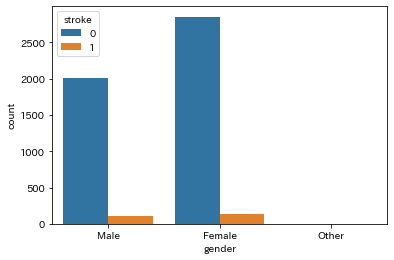

<Figure size 432x288 with 0 Axes>

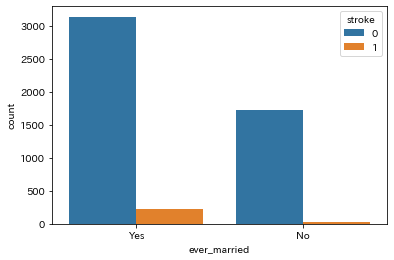

<Figure size 432x288 with 0 Axes>

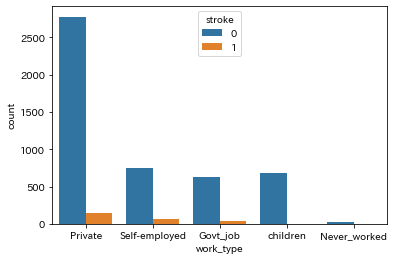

<Figure size 432x288 with 0 Axes>

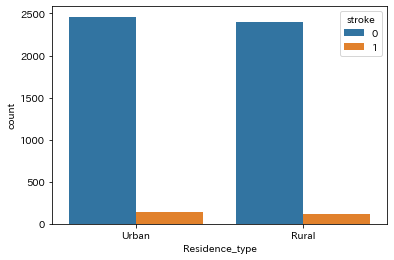

<Figure size 432x288 with 0 Axes>

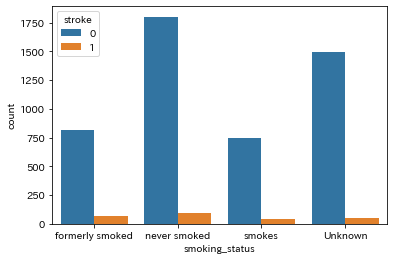

<Figure size 432x288 with 0 Axes>

In [8]:
for col in df.dtypes[df.dtypes == 'object'].index:
    plt.figure()
    sns.countplot(data=df, x=col, hue='stroke')
    plt.figure()

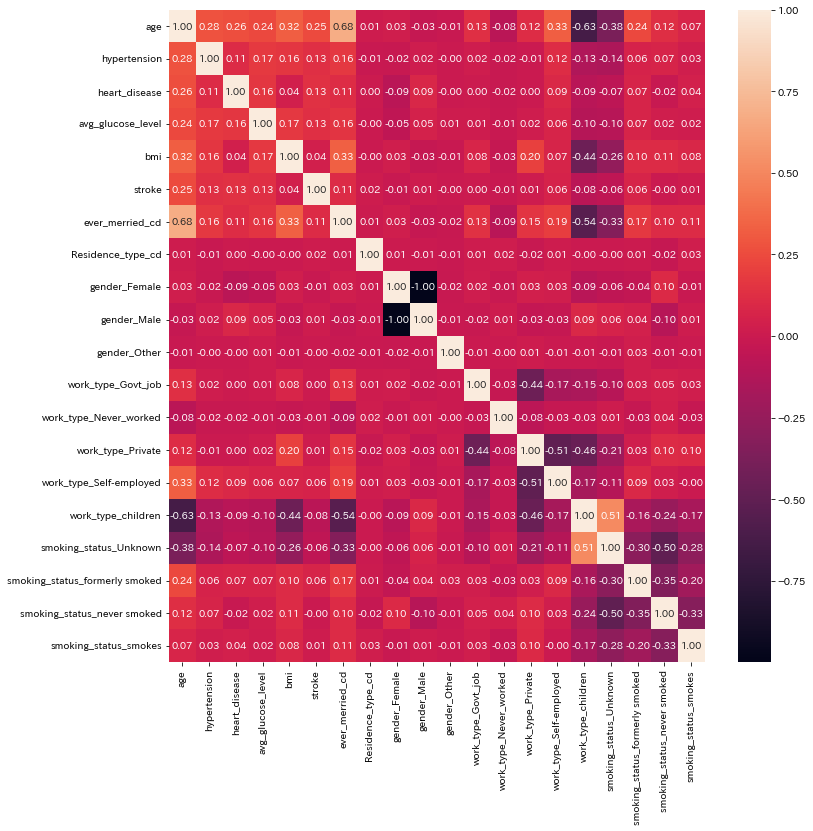

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

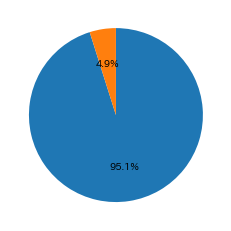

In [19]:
plt.figure()
plt.pie(df.groupby('stroke')['stroke'].count(), counterclock=False,startangle=90, autopct="%1.1f%%")
plt.show()

In [20]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(4088, 19)
(1022, 19)


In [21]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [22]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp


C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.953033,0.000000,0.000000,0.000000,0.944227,0.000000,0.000000,0.000000
1,KNeighborsClassifier,0.953033,0.500000,0.093750,0.157895,0.940313,0.166667,0.017544,0.031746
2,SVC,0.953033,0.000000,0.000000,0.000000,0.944227,0.000000,0.000000,0.000000
3,GaussianNB,0.546233,0.088162,0.927083,0.161013,0.554795,0.102000,0.894737,0.183124
4,DecisionTreeClassifier,0.953767,0.666667,0.031250,0.059701,0.944227,0.000000,0.000000,0.000000
5,RandomForestClassifier,0.953033,0.000000,0.000000,0.000000,0.944227,0.000000,0.000000,0.000000
6,GradientBoostingClassifier,0.959393,1.000000,0.135417,0.238532,0.942270,0.000000,0.000000,0.000000


In [23]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_merried_cd', 'Residence_type_cd'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [25]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision 

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.953278,1.000000,0.005208,0.010363,0.944227,0.00000,0.000000,0.000000
1,KNeighborsClassifier,0.954012,0.700000,0.036458,0.069307,0.944227,0.50000,0.017544,0.033898
2,SVC,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
3,GaussianNB,0.362524,0.068312,0.994792,0.127845,0.363014,0.07932,0.982456,0.146789
4,DecisionTreeClassifier,0.953767,0.666667,0.031250,0.059701,0.944227,0.00000,0.000000,0.000000
5,RandomForestClassifier,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
6,GradientBoostingClassifier,0.959393,1.000000,0.135417,0.238532,0.942270,0.25000,0.017544,0.032787


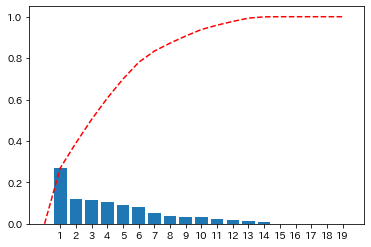

In [26]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [27]:
n = 7
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision 

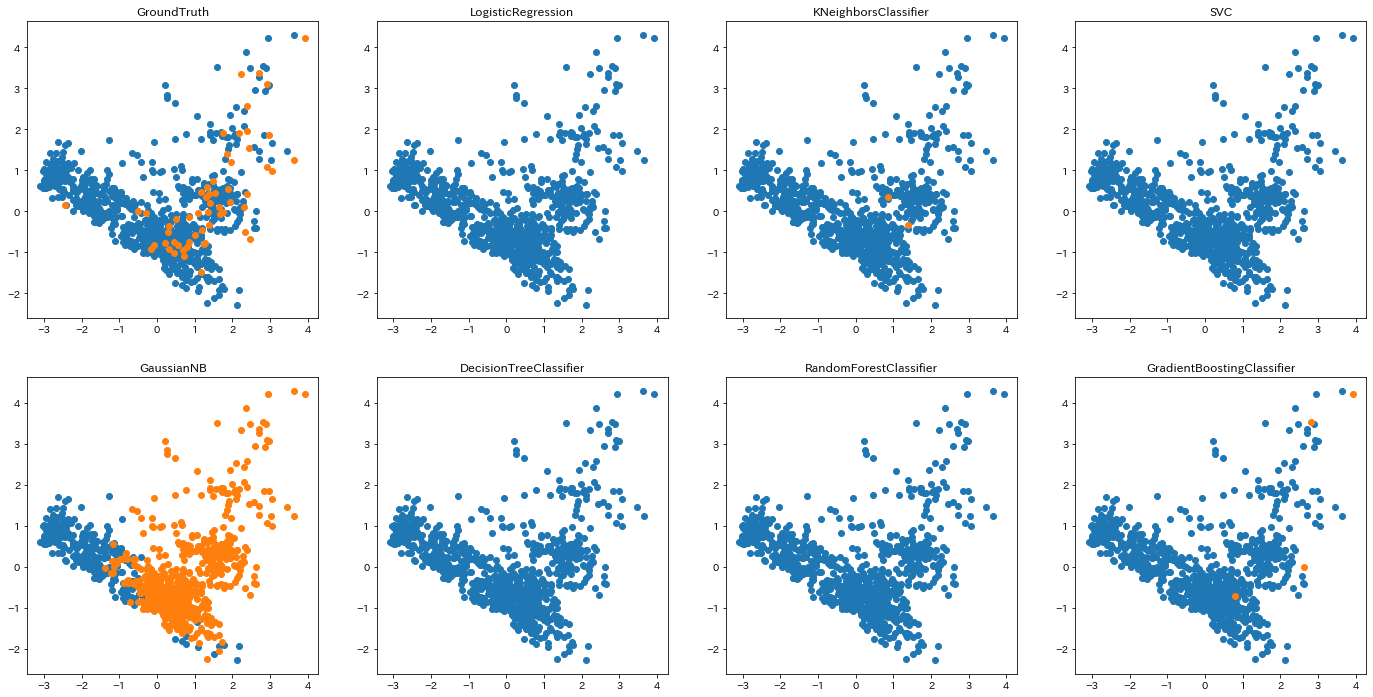

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.953278,1.000000,0.005208,0.010363,0.944227,0.00000,0.000000,0.000000
1,KNeighborsClassifier,0.954012,0.700000,0.036458,0.069307,0.944227,0.50000,0.017544,0.033898
2,SVC,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
3,GaussianNB,0.362524,0.068312,0.994792,0.127845,0.363014,0.07932,0.982456,0.146789
4,DecisionTreeClassifier,0.953767,0.666667,0.031250,0.059701,0.944227,0.00000,0.000000,0.000000
5,RandomForestClassifier,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
6,GradientBoostingClassifier,0.959393,1.000000,0.135417,0.238532,0.942270,0.25000,0.017544,0.032787


In [28]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp

Accuracy(訓練) 0.3576320939334638
Precision(訓練) 0.06659544159544159
Recall(訓練) 0.9739583333333334
F1(訓練) 0.12466666666666665
Accuracy(テスト) 0.35909980430528377
Precision(テスト) 0.07887323943661972
Recall(テスト) 0.9824561403508771
F1(テスト) 0.14602346805736638


Text(0.5, 1.0, 'kMeans')

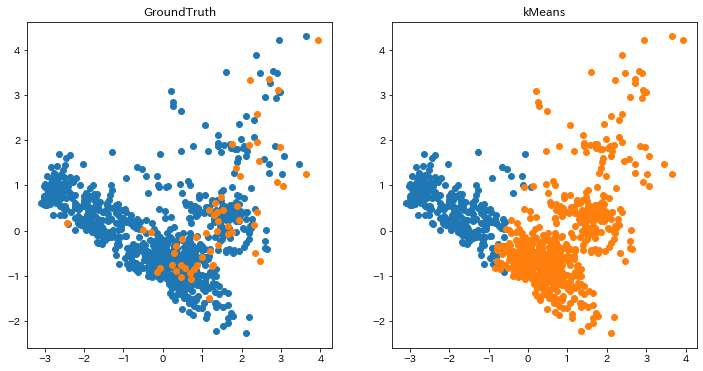

In [33]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=2).fit(X_train_pca)
y_pred = model.predict(X_train_pca)
print('Accuracy(訓練)', metrics.accuracy_score(y_train, y_pred))
print('Precision(訓練)',metrics.precision_score(y_train, y_pred))
print('Recall(訓練)',metrics.recall_score(y_train, y_pred))
print('F1(訓練)', metrics.f1_score(y_train, y_pred))
y_pred = model.predict(X_test_pca)
print('Accuracy(テスト)', metrics.accuracy_score(y_test, y_pred))
print('Precision(テスト)',metrics.precision_score(y_test, y_pred))
print('Recall(テスト)',metrics.recall_score(y_test, y_pred))
print('F1(テスト)', metrics.f1_score(y_test, y_pred))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12.0,6.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for j in np.unique(y_pred):
    X_tmp = X_test_pca[y_pred == j]
    ax[1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[1].set_title('kMeans')